In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read the file and display
df = pd.read_csv("../data/season_record_LAA_2017.csv", index_col=0)
display(df.head())
display(df.tail())

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Monday, Apr 3",LAA,@,OAK,L,2.0,4.0,9.0,0-1,3.0,1.0,Graveman,Nolasco,Casilla,2:56,N,36067.0,1.05,-1,NaN
2,"Tuesday, Apr 4",LAA,@,OAK,W,7.0,6.0,9.0,1-1,2.0,1.0,Bailey,Dull,Bedrosian,3:17,N,11225.0,1.02,1,NaN
3,"Wednesday, Apr 5",LAA,@,OAK,W,5.0,0.0,9.0,2-1,2.0,1.0,Ramirez,Cotton,None,3:15,N,13405.0,1.08,2,NaN
4,"Thursday, Apr 6",LAA,@,OAK,L,1.0,5.0,9.0,2-2,2.0,1.0,Triggs,Skaggs,None,2:44,D,13292.0,1.15,-1,NaN
5,"Friday, Apr 7",LAA,Home,SEA,W,5.0,1.0,9.0,3-2,1.0,Tied,Chavez,Gallardo,None,2:56,N,43911.0,1.09,1,NaN


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
158,"Wednesday, Sep 27",LAA,@,CHW,L-wo,4.0,6.0,10.0,78-80,2.0,20.0,Farquhar,Parker,None,3:58,N,17012.0,0.01,-1,NaN
159,"Thursday, Sep 28",LAA,@,CHW,L,4.0,5.0,9.0,78-81,2.0,21.0,Infante,Chavez,Minaya,3:04,N,19596.0,0.00,-2,NaN
160,"Friday, Sep 29",LAA,Home,SEA,W,6.0,5.0,9.0,79-81,2.0,21.0,Wood,Rzepczynski,Parker,3:01,N,35106.0,0.00,1,NaN
161,"Saturday, Sep 30",LAA,Home,SEA,L,4.0,6.0,9.0,79-82,2.0,21.0,Lawrence,Bedrosian,Díaz,3:32,N,38075.0,0.00,-1,NaN
162,"Sunday, Oct 1",LAA,Home,SEA,W,6.0,2.0,9.0,80-82,2.0,21.0,Bridwell,Simmons,None,2:38,D,34940.0,0.00,1,NaN


In [25]:
# construct a new dataframe with the columns we want
statistics_df = df[["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"]]
# add columns for previous w/l, w-l and rank
statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
statistics_df["Prev_Rank"] = statistics_df["Rank"].shift(1)
statistics_df["Prev_Streak"] = statistics_df["Streak"].shift(1)
# add a column to determine if last game was overtime or not (using W/L column, if the value contains -wo, then it was overtime)
statistics_df["Prev_IsOvertime"] = statistics_df["W/L"].apply(lambda x: 1 if "-wo" in str(x) else 0).shift(1)

# add a winning-rate column (W / (W + L))

statistics_df["Winning_Rate"] = statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0])) / statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))
# add a column to show the game day of the week
statistics_df["Day"] = statistics_df["Date"].apply(lambda x: x.split(",")[0])
# add a column to show the game month
statistics_df["Month"] = statistics_df["Date"].apply(lambda x: x.split(",")[1].split(" ")[1])

# convert values containing -wo in W/L and Prev_W/L to W or L
statistics_df["W/L"] = statistics_df["W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
statistics_df["Prev_W/L"] = statistics_df["Prev_W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)

# display the new dataframe
display(statistics_df.head())
display(statistics_df.tail())


C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
1,"Monday, Apr 3",L,0-1,3.0,36067.0,-1,NaN,0-0,NaN,NaN,NaN,NaN,Monday,Apr
2,"Tuesday, Apr 4",W,1-1,2.0,11225.0,1,L,0-1,3.0,-1.0,0.0,0.000000,Tuesday,Apr
3,"Wednesday, Apr 5",W,2-1,2.0,13405.0,2,W,1-1,2.0,1.0,0.0,0.500000,Wednesday,Apr
4,"Thursday, Apr 6",L,2-2,2.0,13292.0,-1,W,2-1,2.0,2.0,0.0,0.666667,Thursday,Apr
5,"Friday, Apr 7",W,3-2,1.0,43911.0,1,L,2-2,2.0,-1.0,0.0,0.500000,Friday,Apr


,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
158,"Wednesday, Sep 27",L,78-80,2.0,17012.0,-1,W,78-79,2.0,1.0,0.0,0.496815,Wednesday,Sep
159,"Thursday, Sep 28",L,78-81,2.0,19596.0,-2,L,78-80,2.0,-1.0,1.0,0.493671,Thursday,Sep
160,"Friday, Sep 29",W,79-81,2.0,35106.0,1,L,78-81,2.0,-2.0,0.0,0.490566,Friday,Sep
161,"Saturday, Sep 30",L,79-82,2.0,38075.0,-1,W,79-81,2.0,1.0,0.0,0.493750,Saturday,Sep
162,"Sunday, Oct 1",W,80-82,2.0,34940.0,1,L,79-82,2.0,-1.0,0.0,0.490683,Sunday,Oct


Text(0, 0.5, 'Winning Rate')

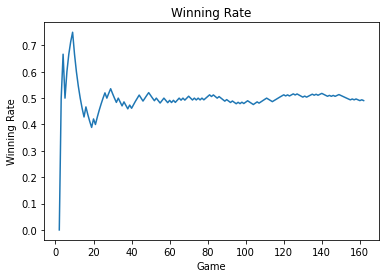

In [26]:
# plot winning rate line chart
plt.plot(statistics_df["Winning_Rate"])
plt.title("Winning Rate")
plt.xlabel("Game")
plt.ylabel("Winning Rate")

Text(0, 0.5, 'Attendance')

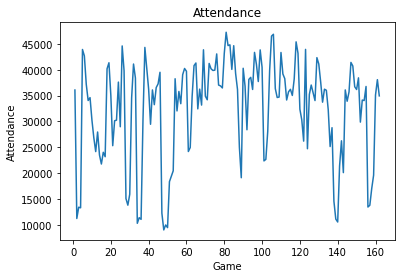

In [27]:
# plot attendance line chart
plt.plot(statistics_df["Attendance"])
plt.title("Attendance")
plt.xlabel("Game")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

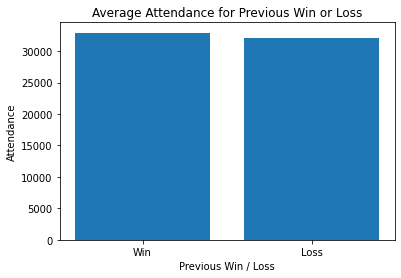

In [28]:
# plot a bar chart to see if previous game was win or loss, the average attendance difference

# calculate the average attendance when the previous game was win
prev_win_attendance = statistics_df[statistics_df["Prev_W/L"] == "W"]["Attendance"].mean()
# calculate the average attendance when the previous game was loss
prev_loss_attendance = statistics_df[statistics_df["Prev_W/L"] == "L"]["Attendance"].mean()
# plot bar chart
plt.bar(["Win", "Loss"], [prev_win_attendance, prev_loss_attendance])
plt.title("Average Attendance for Previous Win or Loss")
plt.xlabel("Previous Win / Loss")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

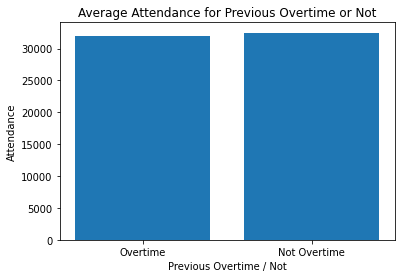

In [29]:
# plot a bar chart to see if previous game was overtime or not, the average attendance difference

# calculate the average attendance when the previous game was overtime
prev_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 1]["Attendance"].mean()
# calculate the average attendance when the previous game was not overtime
prev_not_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 0]["Attendance"].mean()
# plot bar chart
plt.bar(["Overtime", "Not Overtime"], [prev_overtime_attendance, prev_not_overtime_attendance])
plt.title("Average Attendance for Previous Overtime or Not")
plt.xlabel("Previous Overtime / Not")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

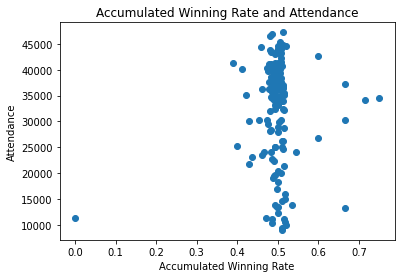

In [30]:
# plot a scatter chart to see accumulated winning rate and attendance

plt.scatter(statistics_df["Winning_Rate"], statistics_df["Attendance"])
plt.title("Accumulated Winning Rate and Attendance")
plt.xlabel("Accumulated Winning Rate")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

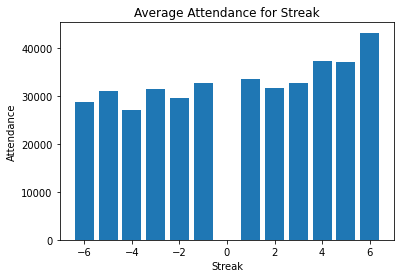

In [31]:
# plot a bar chart to see the streak and attendance

# get the streak values
streak_values = statistics_df["Streak"].unique()
# calculate the average attendance for each streak value
streak_attendance = [statistics_df[statistics_df["Streak"] == streak]["Attendance"].mean() for streak in streak_values]
# plot bar chart
plt.bar(streak_values, streak_attendance)
plt.title("Average Attendance for Streak")
plt.xlabel("Streak")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

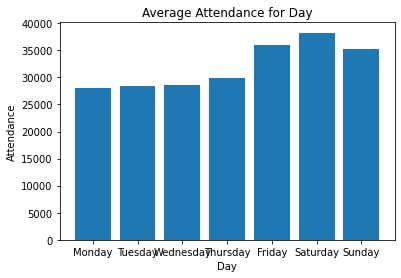

In [32]:
# plot a bar chart to see the day of the week and attendance

# get the day values
day_values = statistics_df["Day"].unique()
# calculate the average attendance for each day value
day_attendance = [statistics_df[statistics_df["Day"] == day]["Attendance"].mean() for day in day_values]
# plot bar chart
plt.bar(day_values, day_attendance)
plt.title("Average Attendance for Day")
plt.xlabel("Day")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

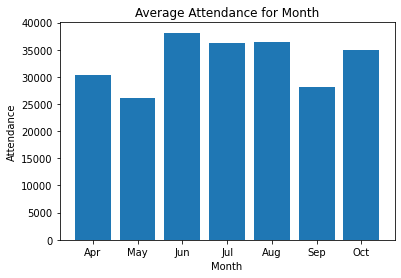

In [33]:
# plot a bar chart to see the month and attendance

# get the month values
month_values = statistics_df["Month"].unique()
# calculate the average attendance for each month value
month_attendance = [statistics_df[statistics_df["Month"] == month]["Attendance"].mean() for month in month_values]
# plot bar chart
plt.bar(month_values, month_attendance)
plt.title("Average Attendance for Month")
plt.xlabel("Month")
plt.ylabel("Attendance")